# Visualization of RSMs

Lets compare the RSMs
- between the 2 methods (cosine similarity vs spearman)
- between ROIs
- between subjects

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Set the base directory
base_dir = '/home/hmueller2/ibc_code/'

# Define the paths to the RSMs
rsm_spearman_path = os.path.join(base_dir, 'ibc_output_RSA_spearman')
rsm_cosine_path = os.path.join(base_dir, 'ibc_output_RSA_test')

# Print the paths to verify
print(f"Spearman RSM path: {rsm_spearman_path}")
print(f"Cosine RSM path: {rsm_cosine_path}")

Spearman RSM path: /home/hmueller2/ibc_code/ibc_output_RSA_spearman
Cosine RSM path: /home/hmueller2/ibc_code/ibc_output_RSA_test


In [10]:
# Define the subject and parcel
subject = 'sub-07'
parcel = 'rsm_R_7Pm'
method = 'cosine'

## 1. Cosine vs Spearman

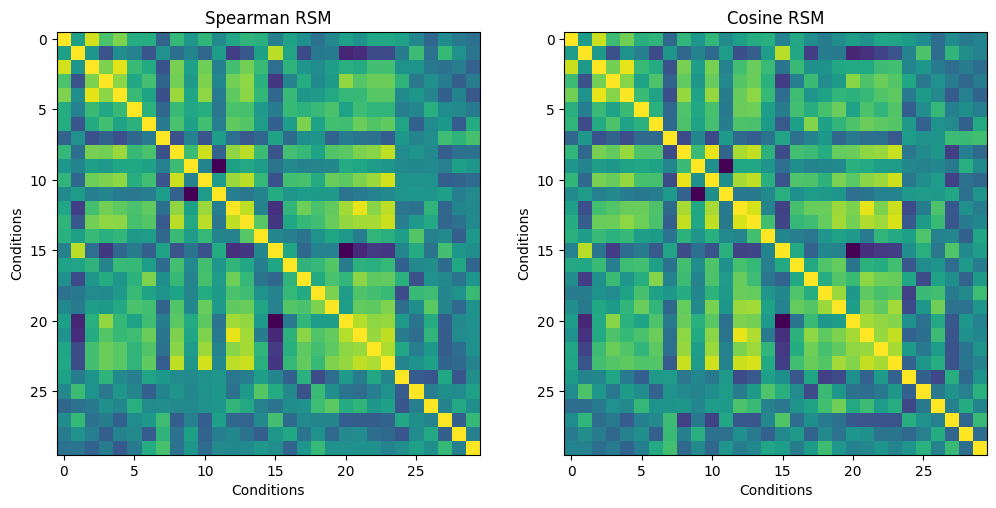

In [ ]:
# Load the RSMs for the subject and parcel
rsm_spearman = np.loadtxt(os.path.join(rsm_spearman_path, subject, f'{parcel}_ROI_{subject}_task-all_tasks_contrast-all_contrasts.csv'), delimiter=',')
rsm_cosine = np.loadtxt(os.path.join(rsm_cosine_path, subject, f'{parcel}_ROI_{subject}_task-all_tasks_contrast-all_contrasts_method-cosine.csv'), delimiter=',')

# Plot the RSMs for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(rsm_spearman, cmap='viridis')
axes[0].set_title('Spearman RSM')
axes[0].set_xlabel('Conditions')
axes[0].set_ylabel('Conditions')

axes[1].imshow(rsm_cosine, cmap='viridis')
axes[1].set_title('Cosine RSM')
axes[1].set_xlabel('Conditions')
axes[1].set_ylabel('Conditions')

plt.show()

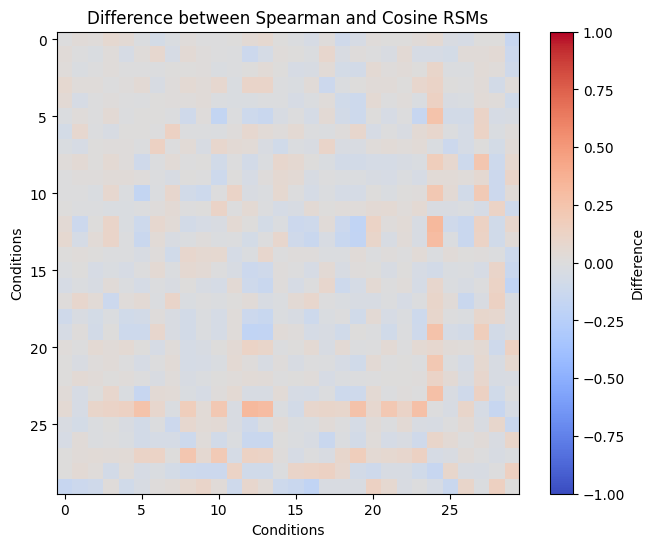

Maximum difference between the matrices: 0.32430659520720223


In [ ]:
# Calculate the difference between the two matrices
difference_matrix = rsm_spearman - rsm_cosine

# Plot the difference matrix
plt.figure(figsize=(8, 6))
plt.imshow(difference_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Difference')
plt.title('Difference between Spearman and Cosine RSMs')
plt.xlabel('Conditions')
plt.ylabel('Conditions')
plt.show()

# Print the maximum difference
max_difference = np.max(np.abs(difference_matrix))
print(f"Maximum difference between the matrices: {max_difference}")

## 2. Compare ROIs within subject

Text(0, 0.5, 'Conditions')

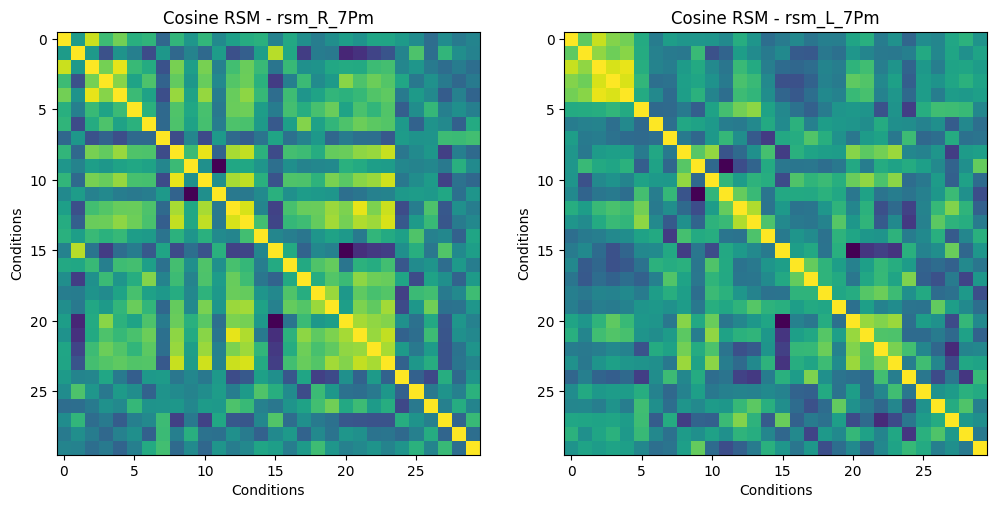

In [18]:
# Define the parcel to compare
parcel_compare = 'rsm_L_7Pm'

# Load the RSMs for the subject and parcel_compare
rsm_cosine_compare = np.loadtxt(os.path.join(rsm_cosine_path, subject, f'{parcel_compare}_ROI_{subject}_task-all_tasks_contrast-all_contrasts_method-{method}.csv'), delimiter=',')

# Plot the RSMs for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(rsm_cosine, cmap='viridis')
axes[0].set_title(f'Cosine RSM - {parcel}')
axes[0].set_xlabel('Conditions')
axes[0].set_ylabel('Conditions')

axes[1].imshow(rsm_cosine_compare, cmap='viridis')
axes[1].set_title(f'Cosine RSM - {parcel_compare}')
axes[1].set_xlabel('Conditions')
axes[1].set_ylabel('Conditions')